# Практическая работа 5 Журавлев Александр ББМО-02-23

# Установим модуль Scrapy

In [3]:
!pip install scrapy

In [ ]:
!scrapy startproject quotes

# Извлекаем данные с помощью Spider

In [8]:
%%writefile quotes/quotes/spiders/spider.py
 
import scrapy

class QuoteSpider(scrapy.Spider):
    name = 'quotes'
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {
                'text': quote.css('span.text::text').get(),
                'author': quote.css('span small::text').get(),
                'tags': quote.css('div.tags a.tag::text').getall(),
            }

        next_page = response.css('li.next a::attr(href)').get()
        if next_page is not None:
            yield response.follow(next_page, self.parse)

Overwriting quotes/quotes/spiders/spider.py


In [18]:
!cd quotes && scrapy crawl quotes -o quotes.json

2024-06-01 19:01:29 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: quotes)
2024-06-01 19:01:29 [scrapy.utils.log] INFO: Versions: lxml 4.8.0.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1n  15 Mar 2022), cryptography 3.4.8, Platform Windows-10-10.0.19045-SP0
2024-06-01 19:01:30 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'quotes',
 'NEWSPIDER_MODULE': 'quotes.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['quotes.spiders']}
2024-06-01 19:01:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2024-06-01 19:01:31 [scrapy.extensions.telnet] INFO: Telnet Password: b07c58c77539313d
2024-06-01 19:01:31 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extension

2024-06-01 19:01:39 [scrapy.extensions.feedexport] INFO: Stored json feed (100 items) in: quotes.json
2024-06-01 19:01:39 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 2925,
 'downloader/request_count': 11,
 'downloader/request_method_count/GET': 11,
 'downloader/response_bytes': 22168,
 'downloader/response_count': 11,
 'downloader/response_status_count/200': 10,
 'downloader/response_status_count/404': 1,
 'elapsed_time_seconds': 6.246186,
 'feedexport/success_count/FileFeedStorage': 1,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2024, 6, 1, 16, 1, 39, 450075),
 'httpcompression/response_bytes': 108778,
 'httpcompression/response_count': 11,
 'item_scraped_count': 100,
 'log_count/DEBUG': 112,
 'log_count/INFO': 11,
 'request_depth_max': 9,
 'response_received_count': 11,
 'robotstxt/request_count': 1,
 'robotstxt/response_count': 1,
 'robotstxt/response_status_count/404': 1,
 'scheduler/dequeued': 10,
 'scheduler/dequeued/memor

In [24]:
import pandas as pd

df = pd.read_json('quotes/quotes.json')

df.describe()

,text,author,tags
count,100,100,100
unique,100,50,84
top,“The world as we have created it is a process ...,Albert Einstein,[love]
freq,1,10,4


# Анализ данных

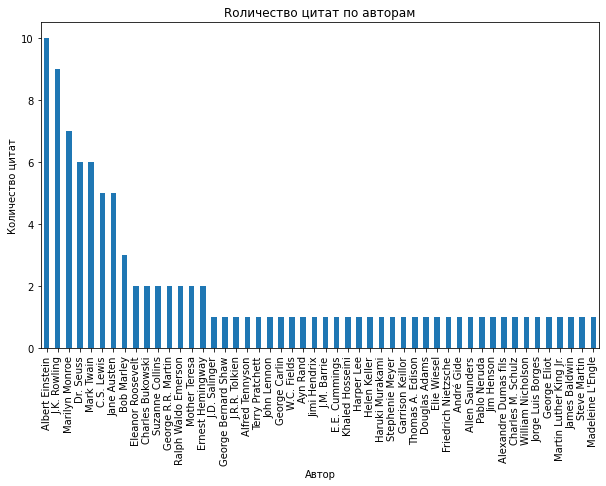

Уникальные теги цитат:
['change' 'deep-thoughts' 'thinking' 'world' 'abilities' 'choices'
 'inspirational' 'life' 'live' 'miracle' 'miracles' 'aliteracy' 'books'
 'classic' 'humor' 'be-yourself' 'adulthood' 'success' 'value' 'love'
 'edison' 'failure' 'paraphrased' 'misattributed-eleanor-roosevelt'
 'obvious' 'simile' 'friends' 'heartbreak' 'sisters' 'courage'
 'simplicity' 'understand' 'fantasy' 'navigation' 'activism' 'apathy'
 'hate' 'indifference' 'opposite' 'philosophy' 'friendship'
 'lack-of-friendship' 'lack-of-love' 'marriage' 'unhappy-marriage'
 'contentment' 'fate' 'misattributed-john-lennon' 'planning' 'plans'
 'poetry' 'happiness' 'attributed-no-source' 'religion' 'comedy'
 'yourself' 'children' 'fairy-tales' nan 'imagination' 'music' 'learning'
 'reading' 'seuss' 'dumbledore' 'misattributed-to-mother-teresa' 'death'
 'chocolate' 'food' 'misattributed-to-c-s-lewis' 'knowledge'
 'understanding' 'wisdom' 'library' 'read' 'readers' 'reading-books' 'tea'
 'girls' 'hope' 'attrib

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['author'].value_counts().plot(kind='bar')
plt.xlabel('Автор')
plt.ylabel('Количество цитат')
plt.title('Rоличество цитат по авторам')
plt.show()

unique_tags = df['tags'].explode().unique()
print("Уникальные теги цитат:")
print(unique_tags)

tag_counts = df['tags'].explode().value_counts()
print("Частота упоминания тегов:")
print(tag_counts)